# Data Mining Project - Sustainability Around The World 
### Aradhya Mathur and Ozlem Gunes

## Exploratory Data Analysis

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#Reading Dataset
epi2022 = pd.read_csv('epi2022.csv')
EPI = epi2022[['country', 'region','EPI.new',
               'PCC.new','CCH.new','CDA.new','CHA.new','FGA.new', 'NDA.new','BCA.new','GHN.new','LCB.new','GIB.new','GHP.new',
               'HLT.new','AIR.new','HAD.new','PMD.new','OZD.new','NOE.new','SOE.new','COE.new','VOE.new',
               'H2O.new','USD.new','UWD.new',
               'HMT.new','PBD.new',
               'WMG.new','MSW.new','REC.new','OCP.new',
               'ECO.new','BDH.new','TBN.new','TBG.new','MPA.new','PAR.new','SHI.new','SPI.new','BHV.new',
               'ECS.new','TCL.new','GRL.new','WTL.new',
               'FSH.new','FSS.new','RMS.new','FTD.new',
               'ACD.new','SDA.new','NXA.new',
               'AGR.new','SPU.new','SNM.new',
               'WRS.new','WWT.new'
               ]]
#Changing column names for ease
EPI.columns = ['Country', 'Region', 'EPI',
               'PCC','CCH','CDA','CHA','FGA', 'NDA','BCA','GHN','LCB','GIB','GHP',
               'HLT','AIR','HAD','PMD','OZD','NOE','SOE','COE','VOE',
               'H2O','USD','UWD',
               'HMT','PBD',
               'WMG','MSW','REC','OCP',
               'ECO','BDH','TBN','TBG','MPA','PAR','SHI','SPI','BHV',
               'ECS','TCL','GRL','WTL',
               'FSH','FSS','RMS','FTD',
               'ACD','SDA','NXA',
               'AGR','SPU','SNM',
               'WRS','WWT']
EPI.head() #Displaying EPI dataset

,Country,Region,EPI,PCC,CCH,CDA,CHA,FGA,NDA,BCA,...,RMS,FTD,ACD,SDA,NXA,AGR,SPU,SNM,WRS,WWT
0,Afghanistan,Southern Asia,43.6,65.6,65.6,83.9,50.2,54.5,63.7,42.9,...,28.2,0.6,35.5,0.0,71.0,44.2,37.3,51.0,0.0,0.0
1,Albania,Eastern Europe,47.1,52.5,52.5,42.3,50.1,59.4,76.9,100.0,...,30.2,0.8,90.2,100.0,80.4,28.9,20.2,37.6,1.9,1.9
2,Algeria,Greater Middle East,29.6,20.9,20.9,18.8,36.1,76.5,46.3,63.9,...,12.4,9.3,70.8,95.9,45.7,63.3,81.8,44.8,33.1,33.1
3,Angola,Sub-Saharan Africa,30.5,37.7,37.7,39.0,49.7,57.7,70.4,51.8,...,17.6,7.9,50.5,39.0,61.9,24.9,20.4,29.3,0.0,0.0
4,Antigua and Barbuda,Latin America & Caribbean,52.4,60.2,60.2,37.4,50.2,60.9,79.0,69.0,...,9.0,6.4,93.2,100.0,86.5,5.1,18.4,5.1,15.7,15.7


<AxesSubplot:>

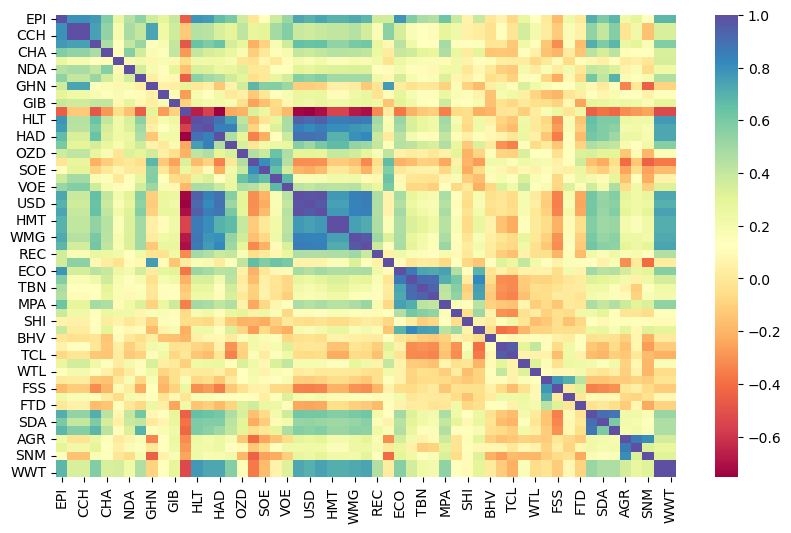

In [3]:
#Heatmap for EPI Dataset
plt.figure(figsize = (10,6))
sns.heatmap(EPI.corr(), cmap="Spectral")

In [4]:
#EPI attributes just for USA
USA = EPI.iloc[172:173]
USA

,Country,Region,EPI,PCC,CCH,CDA,CHA,FGA,NDA,BCA,...,RMS,FTD,ACD,SDA,NXA,AGR,SPU,SNM,WRS,WWT
172,United States of America,Global West,51.1,37.2,37.2,57.8,53.3,81.7,73.6,100.0,...,13.0,10.0,100.0,100.0,100.0,61.4,50.9,71.9,58.9,58.9


In [5]:
#Checking Original vs Expected Data
usa_pcc = USA.PCC
usa_hlt = USA.HLT
usa_eco = USA.ECO
epi_expected = 0.38*usa_pcc + 0.20*usa_hlt + 0.42*usa_eco
print('Expected EPI is:', epi_expected)
epi_original = USA.EPI
print('Original EPI is', epi_original)

Expected EPI is: 172    51.084
dtype: float64
Original EPI is 172    51.1
Name: EPI, dtype: float64


Scatter Plots for EPI vs PCC, HLT and ECO

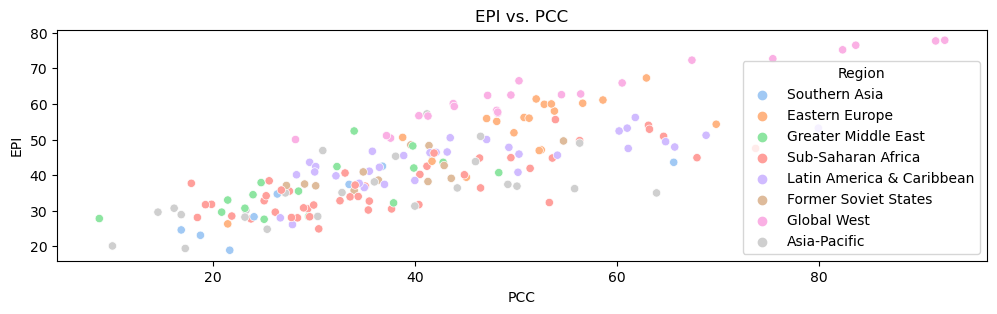

In [6]:
#EPI vs PCC
plt.figure(figsize=(12,3))
sns.scatterplot(y=EPI.EPI, x=EPI.PCC, hue=EPI.Region, palette = 'pastel')
plt.ylabel('EPI')
plt.xlabel('PCC')
plt.title("EPI vs. PCC")
plt.show()

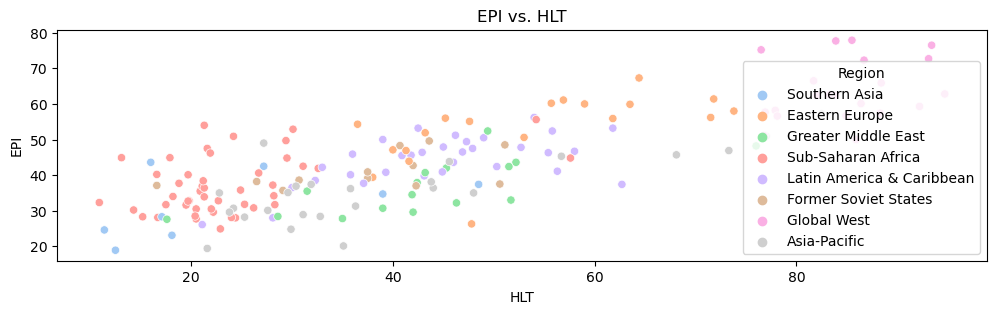

In [7]:
#EPI vs HLT
plt.figure(figsize=(12,3))
sns.scatterplot(y=EPI.EPI, x=EPI.HLT, hue=EPI.Region, palette = 'pastel')
plt.ylabel('EPI')
plt.xlabel('HLT')
plt.title("EPI vs. HLT")
plt.show()

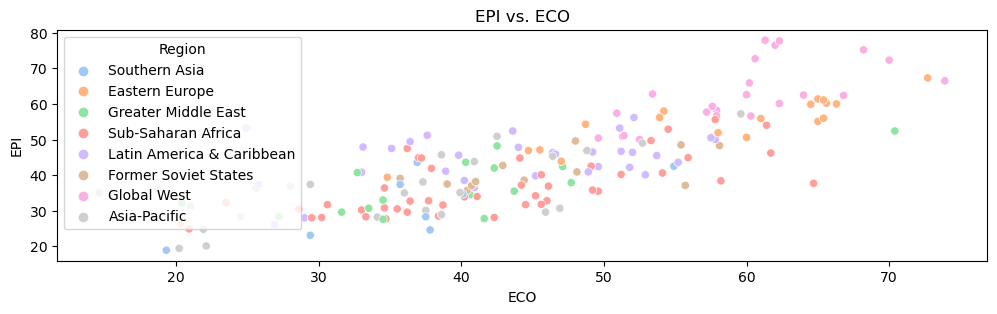

In [8]:
# EPI vs ECO
plt.figure(figsize=(12,3))
sns.scatterplot(y=EPI.EPI, x=EPI.ECO, hue=EPI.Region, palette = 'pastel')
plt.ylabel('EPI')
plt.xlabel('ECO')
plt.title("EPI vs. ECO")
plt.show()

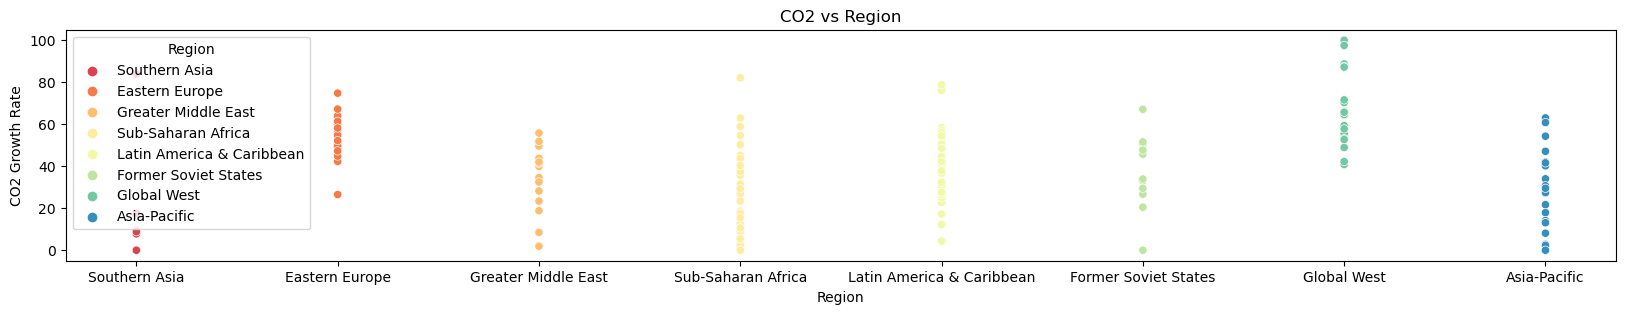

In [9]:
#CO2 growth rate vs Region
plt.figure(figsize=(20,3))
sns.scatterplot(y=EPI.CDA, x=EPI.Region, hue=EPI.Region, palette = 'Spectral')
plt.ylabel('CO2 Growth Rate')
plt.xlabel('Region')
plt.title("CO2 vs Region")
plt.show()

In [10]:
#Binning
World = EPI
World['Binned'] = pd.cut(World['EPI'], bins=7, labels=["Very Poor", "Poor", "Below Average", "Average", "Above Average", "Good","Very Good"])
World.sort_values(by=['Binned','EPI'])

,Country,Region,EPI,PCC,CCH,CDA,CHA,FGA,NDA,BCA,...,FTD,ACD,SDA,NXA,AGR,SPU,SNM,WRS,WWT,Binned
74,India,Southern Asia,18.9,21.7,21.7,17.6,48.0,64.2,60.7,100.0,...,3.5,54.4,51.5,57.4,40.0,45.3,34.7,2.2,2.2,Very Poor
112,Myanmar,Asia-Pacific,19.4,17.3,17.3,0.0,30.9,69.0,22.4,31.4,...,4.3,0.0,0.0,0.0,43.0,32.2,53.7,0.0,0.0,Very Poor
177,Viet Nam,Asia-Pacific,20.1,10.1,10.1,0.0,50.8,NaN,40.1,0.0,...,2.4,19.3,26.9,11.7,39.6,28.9,50.3,0.3,0.3,Very Poor
12,Bangladesh,Southern Asia,23.1,18.8,18.8,9.4,37.7,NaN,56.0,46.0,...,11.3,25.8,12.6,39.0,41.4,32.9,49.9,0.0,0.0,Very Poor
123,Pakistan,Southern Asia,24.6,16.9,16.9,8.8,24.5,76.3,31.2,41.1,...,NaN,48.0,42.4,53.5,28.6,22.0,35.1,0.1,0.1,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Sweden,Global West,72.7,75.4,75.4,87.2,68.5,96.0,100.0,100.0,...,8.9,100.0,100.0,100.0,74.0,84.4,63.6,100.0,100.0,Very Good
101,Malta,Global West,75.2,82.3,82.3,87.5,81.5,58.1,100.0,100.0,...,0.5,100.0,100.0,100.0,28.3,NaN,28.3,0.0,0.0,Very Good
57,Finland,Global West,76.5,83.6,83.6,88.7,72.5,92.0,95.5,100.0,...,NaN,100.0,100.0,100.0,62.7,73.1,52.4,100.0,100.0,Very Good
171,United Kingdom,Global West,77.7,91.5,91.5,97.5,71.8,82.4,71.0,100.0,...,9.2,100.0,100.0,100.0,45.0,35.8,54.3,99.0,99.0,Very Good


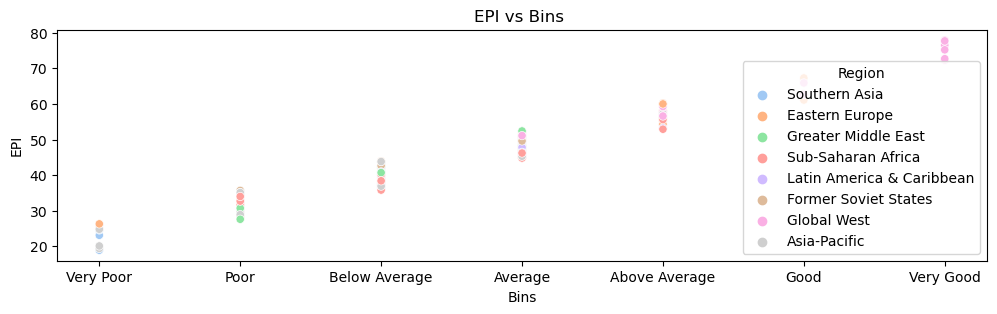

In [11]:
# EPI vs Bins
plt.figure(figsize=(12,3))
sns.scatterplot(y=World.EPI, x=World.Binned, hue=World.Region , palette = 'pastel')
plt.ylabel('EPI')
plt.xlabel('Bins')
plt.title("EPI vs Bins ")
plt.show()

In [12]:
#Climate Change Mitigation
PCC = EPI[['Country', 'Region', 'EPI',
           'PCC','CCH','CDA','CHA','FGA', 'NDA','BCA','GHN','LCB','GIB','GHP']]
PCC

,Country,Region,EPI,PCC,CCH,CDA,CHA,FGA,NDA,BCA,GHN,LCB,GIB,GHP
0,Afghanistan,Southern Asia,43.6,65.6,65.6,83.9,50.2,54.5,63.7,42.9,45.3,100.0,77.5,100.0
1,Albania,Eastern Europe,47.1,52.5,52.5,42.3,50.1,59.4,76.9,100.0,53.9,87.3,49.6,61.5
2,Algeria,Greater Middle East,29.6,20.9,20.9,18.8,36.1,76.5,46.3,63.9,8.6,13.3,23.1,40.6
3,Angola,Sub-Saharan Africa,30.5,37.7,37.7,39.0,49.7,57.7,70.4,51.8,26.4,37.9,45.2,62.3
4,Antigua and Barbuda,Latin America & Caribbean,52.4,60.2,60.2,37.4,50.2,60.9,79.0,69.0,83.5,88.6,48.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Vanuatu,Asia-Pacific,36.9,50.1,50.1,21.7,38.4,NaN,61.5,85.2,80.5,24.3,41.8,67.7
176,Venezuela,Latin America & Caribbean,46.4,42.1,42.1,54.5,50.8,74.5,72.9,100.0,22.3,51.2,0.0,40.3
177,Viet Nam,Asia-Pacific,20.1,10.1,10.1,0.0,50.8,NaN,40.1,0.0,2.5,12.5,45.9,53.1
178,Zambia,Sub-Saharan Africa,38.4,25.6,25.6,0.0,39.7,59.4,68.9,32.0,33.7,39.1,53.8,73.9


                      Country       Region   EPI   PCC   CCH   CDA   CHA  \
172  United States of America  Global West  51.1  37.2  37.2  57.8  53.3   

      FGA   NDA    BCA  GHN   LCB   GIB  GHP  
172  81.7  73.6  100.0  0.0  50.7  61.2  5.7  


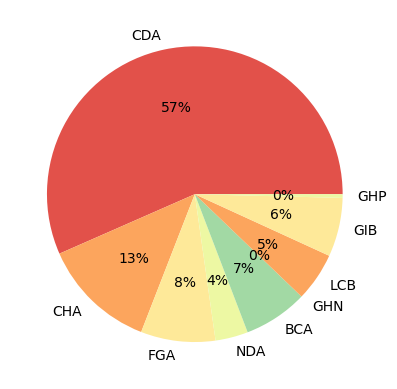

In [13]:
#USA
USA_PCC = PCC.iloc[172:173]
print(USA_PCC)
#Pie Chart with factors in %  responsible for air quality in USA
pcc_data = [0.363*USA_PCC.CDA, 0.087*USA_PCC.CHA, 0.037*USA_PCC.FGA, 0.018*USA_PCC.NDA, 0.026*USA_PCC.BCA,
            0.363*0, 0.039*USA_PCC.LCB, 0.039*USA_PCC.GIB, 0.026*USA_PCC.GHP]
pcc_labels = ['CDA', 'CHA', 'FGA', 'NDA','BCA',
              'GHN','LCB','GIB','GHP']
pcc_colors = sns.color_palette('Spectral')[0:5]
plt.pie(pcc_data, labels=pcc_labels,colors = pcc_colors, autopct = '%0.0f%%')
plt.show()

   Country         Region   EPI   PCC   CCH   CDA   CHA   FGA   NDA    BCA  \
74   India  Southern Asia  18.9  21.7  21.7  17.6  48.0  64.2  60.7  100.0   

    GHN   LCB   GIB   GHP  
74  0.0  17.4  65.9  66.8  


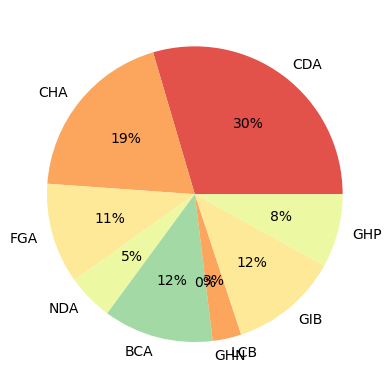

In [14]:
#India
IND_PCC = PCC.iloc[74:75]
print(IND_PCC)
#Pie Chart with factors in %  responsible for air quality in India
ind_pcc_data = [0.363*IND_PCC.CDA, 0.087*IND_PCC.CHA, 0.037*IND_PCC.FGA, 0.018*IND_PCC.NDA, 0.026*IND_PCC.BCA,
            0.363*0, 0.039*IND_PCC.LCB, 0.039*IND_PCC.GIB, 0.026*IND_PCC.GHP]
ind_pcc_labels = ['CDA', 'CHA', 'FGA', 'NDA','BCA',
              'GHN','LCB','GIB','GHP']
ind_pcc_colors = sns.color_palette('Spectral')[0:5]
plt.pie(ind_pcc_data, labels=ind_pcc_labels,colors = ind_pcc_colors, autopct = '%0.0f%%')
plt.show()

In [15]:
PCC_cor = EPI[['PCC','CDA','CHA','FGA', 'NDA','BCA','GHN','LCB','GIB','GHP']]

<AxesSubplot:>

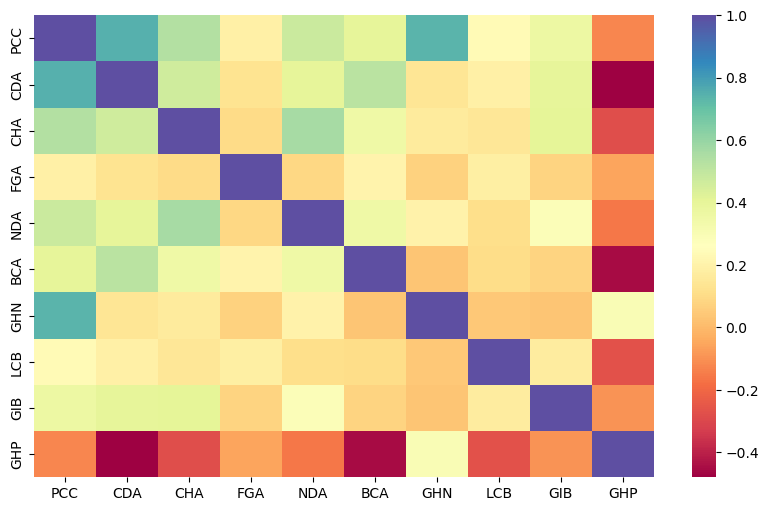

In [16]:
#Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(PCC_cor.corr(), cmap="Spectral")

It is evident that CO2 Growth Rate (CDA) is the biggest factor in Climate Change. In order to mitigate climate change CO2 has to be reduced. 
CO2 growth rate can be defined as the average annual rate of increase or decrease in raw carbon dioxide emissions over the years

In [17]:
#Environmental Health
HLT = EPI[['Country', 'Region', 'EPI',
           'HLT', 'AIR' ,'H2O', 'HMT','WMG']]

HLT

,Country,Region,EPI,HLT,AIR,H2O,HMT,WMG
0,Afghanistan,Southern Asia,43.6,16.0,15.5,28.1,0.0,4.4
1,Albania,Eastern Europe,47.1,40.0,37.5,54.1,45.5,13.4
2,Algeria,Greater Middle East,29.6,42.0,39.4,53.3,38.3,32.0
3,Angola,Sub-Saharan Africa,30.5,20.5,23.1,12.8,36.7,9.6
4,Antigua and Barbuda,Latin America & Caribbean,52.4,55.8,56.5,50.1,59.8,62.3
...,...,...,...,...,...,...,...,...
175,Vanuatu,Asia-Pacific,36.9,30.4,30.7,21.5,44.9,36.5
176,Venezuela,Latin America & Caribbean,46.4,42.9,46.7,46.8,42.5,12.1
177,Viet Nam,Asia-Pacific,20.1,35.1,26.5,52.8,47.1,25.6
178,Zambia,Sub-Saharan Africa,38.4,21.2,23.6,13.5,41.7,6.9


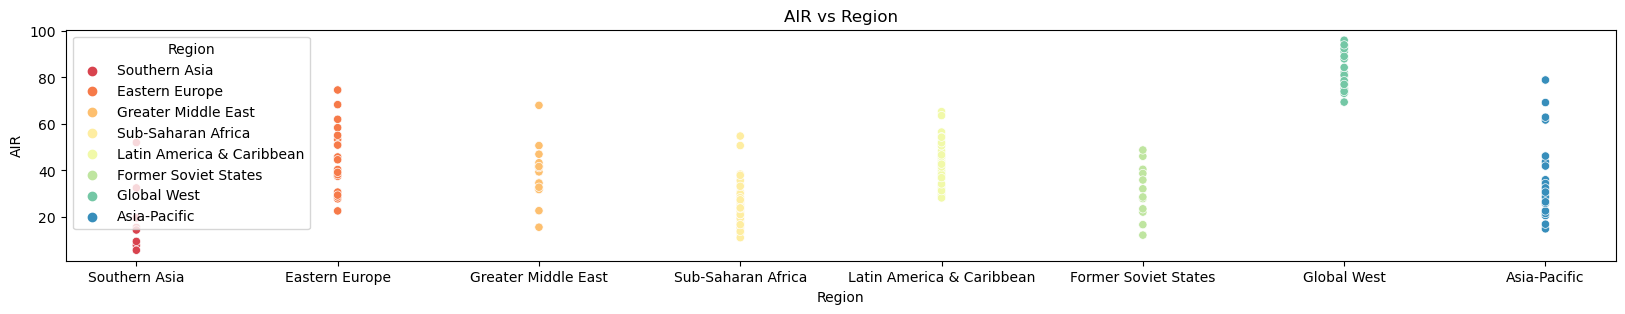

In [18]:
#Air Quality vs Region (Each dot represents a country in that region)
plt.figure(figsize=(20,3))
sns.scatterplot(y=HLT.AIR, x=HLT.Region , hue=EPI.Region, palette = 'Spectral')
plt.ylabel('AIR')
plt.xlabel('Region')
plt.title("AIR vs Region")
plt.show()

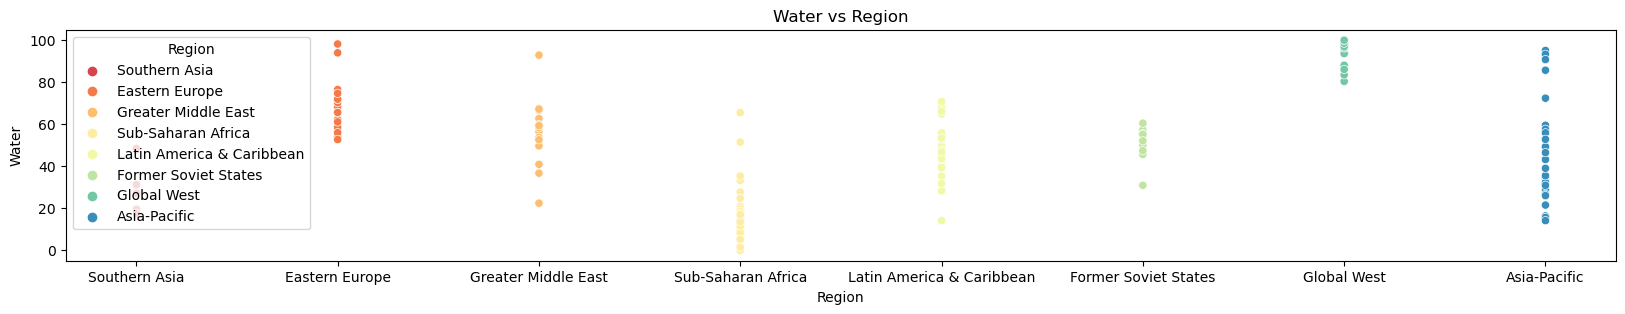

In [19]:
#Water Quality vs Region (Each dot represents a country in that region)
plt.figure(figsize=(20,3))
sns.scatterplot(y=HLT.H2O, x=HLT.Region , hue=EPI.Region, palette = 'Spectral')
plt.ylabel('Water')
plt.xlabel('Region')
plt.title("Water vs Region")
plt.show()

In [20]:
#Air Quality and its components
AIR = epi2022[['country','AIR.new','HAD.new','PMD.new','OZD.new','NOE.new','SOE.new','COE.new','VOE.new']]
AIR.columns = ['Country','AIR','HAD','PMD','OZD','NOE','SOE','COE','VOE']
AIR


,Country,AIR,HAD,PMD,OZD,NOE,SOE,COE,VOE
0,Afghanistan,15.5,7.4,16.0,18.4,37.8,61.2,42.7,37.5
1,Albania,37.5,34.5,36.7,63.7,29.5,43.3,61.5,46.9
2,Algeria,39.4,78.4,12.1,35.6,8.2,27.6,39.9,30.7
3,Angola,23.1,17.9,24.0,36.8,32.4,60.2,30.3,8.3
4,Antigua and Barbuda,56.5,69.3,37.1,100.0,77.2,62.2,91.6,91.4
...,...,...,...,...,...,...,...,...,...
175,Vanuatu,30.7,6.1,34.5,62.7,100.0,82.8,100.0,71.2
176,Venezuela,46.7,74.4,25.1,59.2,30.5,60.6,58.2,10.5
177,Viet Nam,26.5,24.9,28.4,41.3,14.9,33.2,8.4,17.6
178,Zambia,23.6,12.6,28.6,36.4,37.6,43.9,46.6,12.8


In [21]:
#Quality of Air in USA
USA_AIR = AIR.iloc[172:173]
USA_AIR

,Country,AIR,HAD,PMD,OZD,NOE,SOE,COE,VOE
172,United States of America,77.0,97.2,74.6,36.7,15.2,34.7,54.9,34.8


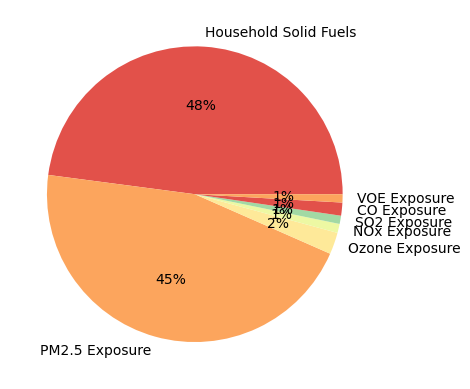

In [22]:
#Pie Chart with factors in %  responsible for air quality in USA
air_data = [0.38*USA_AIR.HAD,0.47*USA_AIR.PMD,USA_AIR.OZD*0.05,USA_AIR.NOE*0.05,USA_AIR.SOE*0.02,USA_AIR.COE*0.02,34.8*0.02]
air_labels = ['Household Solid Fuels', 'PM2.5 Exposure', 'Ozone Exposure', 'NOx Exposure','SO2 Exposure','CO Exposure','VOE Exposure']
air_colors = sns.color_palette('Spectral')[0:5]
plt.pie(air_data, labels=air_labels,colors = air_colors, autopct = '%0.0f%%')
plt.show()

In [23]:
#Clustering
Global_West = HLT.loc[HLT['Region'] == 'Global West']
Binned_Global_West = Global_West 
Binned_Global_West

,Country,Region,EPI,HLT,AIR,H2O,HMT,WMG
7,Australia,Global West,60.1,86.4,91.1,87.1,76.4,69.0
8,Austria,Global West,66.5,81.7,75.0,94.7,90.7,77.4
15,Belgium,Global West,58.2,77.9,74.6,93.6,66.6,68.0
30,Canada,Global West,50.0,85.9,88.0,88.1,95.6,59.5
44,Denmark,Global West,77.9,85.5,80.5,97.5,100.0,68.3
57,Finland,Global West,76.5,93.4,93.5,100.0,100.0,69.6
58,France,Global West,62.5,83.9,82.0,96.3,83.1,63.8
62,Germany,Global West,62.4,82.0,75.2,99.1,89.8,69.0
73,Iceland,Global West,62.8,94.7,96.0,100.0,95.1,73.9
78,Ireland,Global West,57.4,88.3,89.1,97.4,81.8,67.9


In [24]:
#Binning
Binned_Global_West['Binned'] = pd.cut(Binned_Global_West['HLT'], bins=3, labels=["Low", "Mid", "High"])

In [25]:
Binned_Global_West.sort_values(by=['Binned'], ascending=False)

,Country,Region,EPI,HLT,AIR,H2O,HMT,WMG,Binned
155,Sweden,Global West,72.7,93.1,94.0,98.6,96.9,70.8,High
57,Finland,Global West,76.5,93.4,93.5,100.0,100.0,69.6,High
121,Norway,Global West,59.3,92.2,92.4,100.0,93.0,70.7,High
73,Iceland,Global West,62.8,94.7,96.0,100.0,95.1,73.9,High
7,Australia,Global West,60.1,86.4,91.1,87.1,76.4,69.0,Mid
115,Netherlands,Global West,62.6,83.3,76.8,100.0,94.1,66.2,Mid
171,United Kingdom,Global West,77.7,83.9,78.6,100.0,93.6,62.6,Mid
156,Switzerland,Global West,65.9,88.4,84.3,100.0,94.0,76.4,Mid
116,New Zealand,Global West,56.7,84.9,93.2,80.4,74.6,60.9,Mid
95,Luxembourg,Global West,72.3,86.7,81.0,98.7,95.1,79.1,Mid


In [26]:
#HLT Table correlation
HLT.corr().sort_values('HLT', ascending=False)

,EPI,HLT,AIR,H2O,HMT,WMG
HLT,0.787318,1.000000,0.970419,0.940909,0.856427,0.870691
AIR,0.760892,0.970419,1.000000,0.844808,0.803768,0.782319
H2O,0.726705,0.940909,0.844808,1.000000,0.768442,0.848365
WMG,0.724086,0.870691,0.782319,0.848365,0.746793,1.000000
HMT,0.698676,0.856427,0.803768,0.768442,1.000000,0.746793
EPI,1.000000,0.787318,0.760892,0.726705,0.698676,0.724086


<AxesSubplot:>

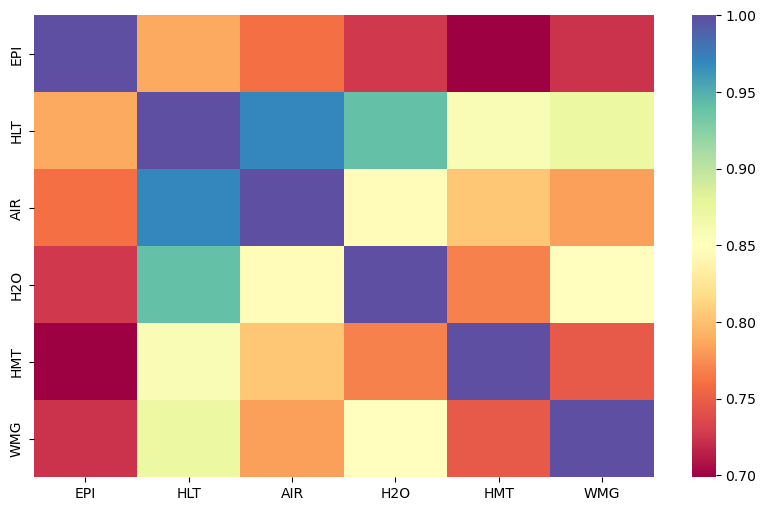

In [27]:
#Heatmap for Environmental Health
plt.figure(figsize = (10,6))
sns.heatmap(HLT.corr(), cmap="Spectral")

In [28]:
#Ecosystem Vitality
ECO = EPI[['Country', 'Region', 'EPI', 'ECO',
           'BDH','ECS','FSH','ACD','AGR','WRS']]
ECO

,Country,Region,EPI,ECO,BDH,ECS,FSH,ACD,AGR,WRS
0,Afghanistan,Southern Asia,43.6,36.9,30.7,61.8,NaN,35.5,44.2,0.0
1,Albania,Eastern Europe,47.1,45.5,63.9,24.2,17.3,90.2,28.9,1.9
2,Algeria,Greater Middle East,29.6,31.6,22.7,23.7,18.5,70.8,63.3,33.1
3,Angola,Sub-Saharan Africa,30.5,28.6,30.1,29.4,24.3,50.5,24.9,0.0
4,Antigua and Barbuda,Latin America & Caribbean,52.4,43.6,54.2,39.5,19.7,93.2,5.1,15.7
...,...,...,...,...,...,...,...,...,...,...
175,Vanuatu,Asia-Pacific,36.9,28.0,20.0,38.6,21.0,63.9,33.0,4.5
176,Venezuela,Latin America & Caribbean,46.4,52.0,71.5,33.6,27.7,74.0,43.6,6.4
177,Viet Nam,Asia-Pacific,20.1,22.1,27.9,8.5,24.2,19.3,39.6,0.3
178,Zambia,Sub-Saharan Africa,38.4,58.2,91.0,19.9,NaN,32.2,53.2,4.5


In [29]:
ECO.corr().sort_values('ECO', ascending=False)

,EPI,ECO,BDH,ECS,FSH,ACD,AGR,WRS
ECO,0.781626,1.000000,0.864343,0.047428,0.056680,0.495587,0.353924,0.563578
BDH,0.578987,0.864343,1.000000,-0.315252,-0.091273,0.316346,0.205035,0.350663
EPI,1.000000,0.781626,0.578987,0.049305,0.005269,0.708948,0.230961,0.678510
WRS,0.678510,0.563578,0.350663,-0.120850,-0.023635,0.517148,0.351885,1.000000
ACD,0.708948,0.495587,0.316346,-0.135172,-0.148010,1.000000,0.223374,0.517148
AGR,0.230961,0.353924,0.205035,-0.159578,-0.119157,0.223374,1.000000,0.351885
FSH,0.005269,0.056680,-0.091273,0.106555,1.000000,-0.148010,-0.119157,-0.023635
ECS,0.049305,0.047428,-0.315252,1.000000,0.106555,-0.135172,-0.159578,-0.120850


<AxesSubplot:>

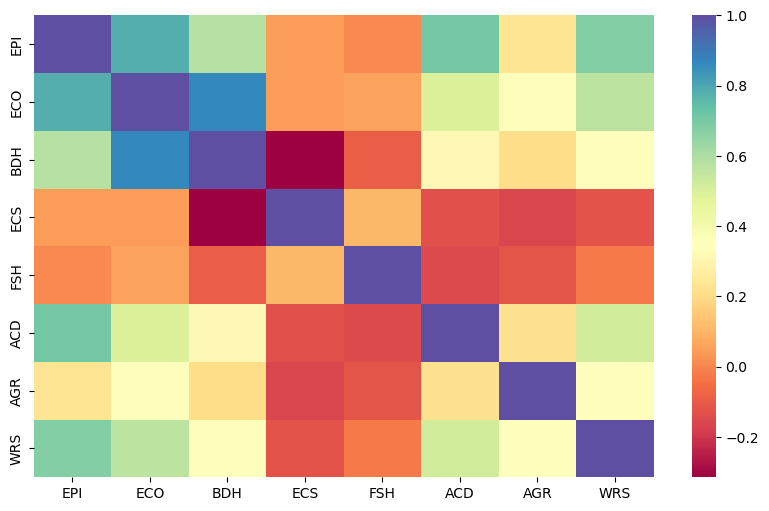

In [30]:
#Heatmap for Ecosystem Vitality
plt.figure(figsize = (10,6))
sns.heatmap(ECO.corr(), cmap="Spectral")

In [31]:
x = ECO.BDH
y = ECO.ECO
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.8829896851952493, pvalue=2.306222299508134e-60)

In [32]:
#Binning 
Binned_ECO = ECO
ECO_Global_West = Binned_ECO.loc[Binned_ECO['Region'] == 'Global West']
ECO_Global_West['Binned'] = pd.cut(ECO_Global_West['ECO'], bins=3, labels=["Low", "Mid", "High"])
ECO_Global_West.sort_values('Binned', ascending=False)

,Country,Region,EPI,ECO,BDH,ECS,FSH,ACD,AGR,WRS,Binned
95,Luxembourg,Global West,72.3,70.0,84.8,18.1,0.0,100.0,55.9,98.0,High
8,Austria,Global West,66.5,73.9,86.0,28.0,10.4,100.0,70.6,94.0,High
62,Germany,Global West,62.4,66.8,88.5,17.9,26.9,100.0,60.9,97.0,High
101,Malta,Global West,75.2,68.2,72.9,100.0,47.8,100.0,28.3,0.0,High
171,United Kingdom,Global West,77.7,62.3,81.5,23.6,17.0,100.0,45.0,99.0,Mid
156,Switzerland,Global West,65.9,60.2,62.5,30.7,NaN,100.0,41.1,97.0,Mid
155,Sweden,Global West,72.7,60.6,68.8,29.3,15.3,100.0,74.0,100.0,Mid
151,Spain,Global West,56.6,60.3,85.8,13.4,16.4,100.0,31.8,91.1,Mid
116,New Zealand,Global West,56.7,57.9,76.6,26.9,7.4,76.0,64.9,79.9,Mid
115,Netherlands,Global West,62.6,60.0,80.1,24.4,13.0,100.0,29.3,100.0,Mid


### Frequent Pattern Mining using Apriori Algorithm

Luxembourg, Austria, Germany and Malta have the best Ecosystem Vitality score among countries lying in Global West

In [33]:

FP_AIR_df = epi2022[['country','region','AIR.new','HAD.new','PMD.new','OZD.new','NOE.new','SOE.new','COE.new','VOE.new']]
FP_AIR_df.columns = ['Country','Region','AIR','HAD','PMD','OZD','NOE','SOE','COE','VOE']

In [34]:
FP_AIR_df['AIR_BIN'] = pd.cut(FP_AIR_df['AIR'], bins=3, labels=["Poor AIR", "Average AIR", "Great AIR"])
FP_AIR_df['HAD_BIN'] = pd.cut(FP_AIR_df['HAD'], bins=3, labels=["Poor HAD", "Average HAD", "Great HAD"])
FP_AIR_df['PMD_BIN'] = pd.cut(FP_AIR_df['PMD'], bins=3, labels=["Poor PMD", "Average PMD", "Great PMD"])
FP_AIR_df['OZD_BIN'] = pd.cut(FP_AIR_df['OZD'], bins=3, labels=["Poor OZD", "Average OZD", "Great OZD"])
FP_AIR_df['NOE_BIN'] = pd.cut(FP_AIR_df['NOE'], bins=3, labels=["Poor NOE", "Average NOE", "Great NOE"])
FP_AIR_df['SOE_BIN'] = pd.cut(FP_AIR_df['SOE'], bins=3, labels=["Poor SOE", "Average SOE", "Great SOE"])
FP_AIR_df['COE_BIN'] = pd.cut(FP_AIR_df['COE'], bins=3, labels=["Poor COE", "Average COE", "Great COE"])
FP_AIR_df['VOE_BIN'] = pd.cut(FP_AIR_df['VOE'], bins=3, labels=["Poor VOE", "Average VOE", "Great VOE"])
FP_AIR_df

,Country,Region,AIR,HAD,PMD,OZD,NOE,SOE,COE,VOE,AIR_BIN,HAD_BIN,PMD_BIN,OZD_BIN,NOE_BIN,SOE_BIN,COE_BIN,VOE_BIN
0,Afghanistan,Southern Asia,15.5,7.4,16.0,18.4,37.8,61.2,42.7,37.5,Poor AIR,Poor HAD,Poor PMD,Poor OZD,Average NOE,Average SOE,Average COE,Average VOE
1,Albania,Eastern Europe,37.5,34.5,36.7,63.7,29.5,43.3,61.5,46.9,Average AIR,Average HAD,Average PMD,Average OZD,Poor NOE,Average SOE,Average COE,Average VOE
2,Algeria,Greater Middle East,39.4,78.4,12.1,35.6,8.2,27.6,39.9,30.7,Average AIR,Great HAD,Poor PMD,Average OZD,Poor NOE,Poor SOE,Average COE,Poor VOE
3,Angola,Sub-Saharan Africa,23.1,17.9,24.0,36.8,32.4,60.2,30.3,8.3,Poor AIR,Poor HAD,Poor PMD,Average OZD,Poor NOE,Average SOE,Poor COE,Poor VOE
4,Antigua and Barbuda,Latin America & Caribbean,56.5,69.3,37.1,100.0,77.2,62.2,91.6,91.4,Average AIR,Great HAD,Average PMD,Great OZD,Great NOE,Average SOE,Great COE,Great VOE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Vanuatu,Asia-Pacific,30.7,6.1,34.5,62.7,100.0,82.8,100.0,71.2,Poor AIR,Poor HAD,Average PMD,Average OZD,Great NOE,Great SOE,Great COE,Great VOE
176,Venezuela,Latin America & Caribbean,46.7,74.4,25.1,59.2,30.5,60.6,58.2,10.5,Average AIR,Great HAD,Poor PMD,Average OZD,Poor NOE,Average SOE,Average COE,Poor VOE
177,Viet Nam,Asia-Pacific,26.5,24.9,28.4,41.3,14.9,33.2,8.4,17.6,Poor AIR,Poor HAD,Poor PMD,Average OZD,Poor NOE,Poor SOE,Poor COE,Poor VOE
178,Zambia,Sub-Saharan Africa,23.6,12.6,28.6,36.4,37.6,43.9,46.6,12.8,Poor AIR,Poor HAD,Poor PMD,Average OZD,Average NOE,Average SOE,Average COE,Poor VOE


In [35]:
FP_AIR_df.drop(['AIR','HAD','PMD','OZD','NOE','SOE','COE','VOE'], axis=1)

,Country,Region,AIR_BIN,HAD_BIN,PMD_BIN,OZD_BIN,NOE_BIN,SOE_BIN,COE_BIN,VOE_BIN
0,Afghanistan,Southern Asia,Poor AIR,Poor HAD,Poor PMD,Poor OZD,Average NOE,Average SOE,Average COE,Average VOE
1,Albania,Eastern Europe,Average AIR,Average HAD,Average PMD,Average OZD,Poor NOE,Average SOE,Average COE,Average VOE
2,Algeria,Greater Middle East,Average AIR,Great HAD,Poor PMD,Average OZD,Poor NOE,Poor SOE,Average COE,Poor VOE
3,Angola,Sub-Saharan Africa,Poor AIR,Poor HAD,Poor PMD,Average OZD,Poor NOE,Average SOE,Poor COE,Poor VOE
4,Antigua and Barbuda,Latin America & Caribbean,Average AIR,Great HAD,Average PMD,Great OZD,Great NOE,Average SOE,Great COE,Great VOE
...,...,...,...,...,...,...,...,...,...,...
175,Vanuatu,Asia-Pacific,Poor AIR,Poor HAD,Average PMD,Average OZD,Great NOE,Great SOE,Great COE,Great VOE
176,Venezuela,Latin America & Caribbean,Average AIR,Great HAD,Poor PMD,Average OZD,Poor NOE,Average SOE,Average COE,Poor VOE
177,Viet Nam,Asia-Pacific,Poor AIR,Poor HAD,Poor PMD,Average OZD,Poor NOE,Poor SOE,Poor COE,Poor VOE
178,Zambia,Sub-Saharan Africa,Poor AIR,Poor HAD,Poor PMD,Average OZD,Average NOE,Average SOE,Average COE,Poor VOE


APRIORI ALGORITHM (AIR DATASET)

In [36]:
def load_df():
    return FP_AIR_df.values.tolist()
def gen_cand1(itemset):
    CANDIDATE1 = []
    for i in itemset:
        for j in i:
            if not [j] in CANDIDATE1:
                CANDIDATE1.append([j])
    return list(map(frozenset, CANDIDATE1)) 
itemset = load_df()
CANDIDATE1 = gen_cand1(itemset)

def database_scan(Db, Ck, min_sup):
    sup_count = {}
    sup_data = {}
    r_list = []
    Db_length = len(Db)
    for t in Db:
        for i in Ck:
            if i.issubset(t):
                if not i in sup_count: sup_count[i]=1
                else: sup_count[i] += 1
    
    total_items = int(Db_length)
    for key in sup_count:
        support = sup_count[key]/total_items
        if support >= min_sup:
            r_list.insert(0,key)
        sup_data[key] = support
    return r_list, sup_data

def generate_apriori(L_k, k): 
    Ck = []
    for l in range(len(L_k)):
        for i in range(l+1, len(L_k)): 
            l1 = list(L_k[l])[:k-2]
            l2 = list(L_k[i])[:k-2]
            l1.sort()
            l2.sort()
            if l1==l2: 
                Ck.append(L_k[l] | L_k[i]) 
    return Ck

def apriori(itemset, min_sup = 0.12):
    CANDIDATE1 = gen_cand1(itemset)
    D = list(map(set, itemset))
    L1, sup_data = database_scan(D, CANDIDATE1, min_sup)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = generate_apriori(L[k-2], k)
        L_k, sup = database_scan(D, Ck, min_sup)
        sup_data.update(sup)
        L.append(L_k)
        k += 1
    return L, sup_data
L,sdata = apriori(itemset)
new_list = []
for index in range(len(L)):
    print("\nL{} ".format(index))
    print("Number of patterns={} \n".format(len(L[index])))
    apriori_freq_pattern = [list(i) for i in L[index]]
    print(apriori_freq_pattern)


L0 
Number of patterns=29 

[['Asia-Pacific'], [0.0], ['Great AIR'], ['Global West'], ['Great SOE'], ['Great VOE'], ['Great COE'], ['Great NOE'], ['Great OZD'], [100.0], ['Latin America & Caribbean'], ['Poor COE'], ['Sub-Saharan Africa'], ['Poor VOE'], ['Poor SOE'], ['Great HAD'], ['Poor NOE'], ['Average OZD'], ['Average PMD'], ['Average HAD'], ['Average AIR'], ['Average VOE'], ['Average COE'], ['Average SOE'], ['Average NOE'], ['Poor OZD'], ['Poor PMD'], ['Poor HAD'], ['Poor AIR']]

L1 
Number of patterns=114 

[['Average PMD', 'Poor AIR'], ['Average PMD', 'Poor HAD'], ['Sub-Saharan Africa', 'Average COE'], ['Great SOE', 'Poor AIR'], ['Great SOE', 'Poor HAD'], ['Average NOE', 'Sub-Saharan Africa'], ['Average NOE', 'Average OZD'], ['Poor VOE', 'Average NOE'], ['Great SOE', 'Poor PMD'], [0.0, 'Poor AIR'], [0.0, 'Poor NOE'], [0.0, 'Poor VOE'], [0.0, 'Poor COE'], ['Poor SOE', 'Poor AIR'], ['Poor VOE', 'Poor OZD'], ['Poor COE', 'Poor OZD'], ['Poor SOE', 'Poor COE'], ['Great SOE', 'Great C

['Poor VOE', 'Poor HAD', 'Poor AIR', 'Average NOE', 'Sub-Saharan Africa'] <br>
['Poor VOE', 'Poor HAD', 'Poor AIR', 'Sub-Saharan Africa', 'Poor PMD']
<br>
<br>
It can be inferred that there is a good chance that if a country has Poor VOE, Poor HAD, Poor AIR, Average NOE it lies in Sub-Saharan Africa <br>
Similarly, it can also be inferred that there is a good chance that if a country has Poor VOE, Poor HAD, Poor AIR, Poor PMD it lies in Sub-Saharan Africa 

## Observations

1) EPI Score has three major components a) Climate Change Mitigation Score b) Environmental Health Score c) Ecosystem Vitality Score <br>
2) Envirnoment Health scores of Global west countries are very high whereas scores of Sub Saharan African countries are very poor. <br>
3) Ecosystem Vitality scores of Global west and Eastern Europe countries are quite high. <br>
4) All the countries which have Very Good EPI score lie in Global West. <br>
5) It is evident that CO2 Growth Rate (CDA) is the biggest factor in Climate Change. In order to mitigate climate change CO2 has to be reduced. CO2 growth rate can be defined as the average annual rate of increase or decrease in raw carbon dioxide emissions over the years <br>
6) Iceland, Norway, Sweden, Finland have the best EPI scores among countries lying in Global West regions. <br>
7) Air Quality scores of Southern Asian countries are very bad while that of Global West are very impressive <br>
8) Water Quality scores of Sub Saharan Africa region is worst while Global West and Eastern Europe have good scores. <br>
9) Luxembourg, Austria, Germany and Malta have the best Ecosystem Vitality score among countries lying in Global West <br>
10) It can be inferred that there is a good chance that if a country has Poor VOE, Poor HAD, Poor AIR, Average NOE it lies in Sub-Saharan Africa  <br>
11) Similarly, it can also be inferred that there is a good chance that if a country has Poor VOE, Poor HAD, Poor AIR, Poor PMD it lies in Sub-Saharan Africa <br>